# Data Analysis of Amazon_Sexy_Pants

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors 
# get_ipython().magic('matplotlib inline')

import os 
os.getcwd()
path = "C:\\Users\\sxw17\\Desktop\\DATA\\data analysis\\sexy panties in Amazon"
os.chdir(path)

In [5]:
item_info = pd.read_csv("each_description.csv")

item_info= item_info.iloc[:, 1:]

reviews = item_info.iloc[:, -1]

item_info.columns=['shop_name','product_name','total_rank','price','review_num','Read reviews that mention',
                   'shop_link','user_name','user_rank','user_short_review','Date_first_listed_on_Amazon','size','color','reviews',]

rank = item_info['total_rank'].tolist()
rank_list=[]
for each in rank:
    score = each.split()[0]
    score = float(score)
    #print(score, type(score))
    rank_list.append(score)
    
item_info['rank_float'] = rank_list

item_info

,shop_name,product_name,total_rank,price,review_num,Read reviews that mention,shop_link,user_name,user_rank,user_short_review,Date_first_listed_on_Amazon,size,color,reviews,rank_float
0,Sofishie,Sofishie Sexy V-Back Criss Cross Panties,4.0 out of 5 stars,$8.99 - $13.99,105,"['good quality', 'ordered a small', 'panties',...",https://www.amazon.com/Sofishie/b/ref=w_bl_sl_...,andrew m nash,5.0 out of 5 stars,Love these panties,"August 23, 2018",Size: Medium,Color: Green,"First off, male user here. I have purchased al...",4.0
1,Sofishie,Sofishie Sexy V-Back Criss Cross Panties,4.0 out of 5 stars,$8.99 - $13.99,105,"['good quality', 'ordered a small', 'panties',...",https://www.amazon.com/Sofishie/b/ref=w_bl_sl_...,Kato,5.0 out of 5 stars,Provocative Undies,"January 11, 2019",Size: Medium,Color: Black,"Sexy look, but didn’t notice the brand until s...",4.0
2,Sofishie,Sofishie Sexy V-Back Criss Cross Panties,4.0 out of 5 stars,$8.99 - $13.99,105,"['good quality', 'ordered a small', 'panties',...",https://www.amazon.com/Sofishie/b/ref=w_bl_sl_...,Kirsten,5.0 out of 5 stars,Sexy Date Night Panties,"May 5, 2019",Size: Large,Color: Black Red,These are really cute and sexy. I wouldn’t wea...,4.0
3,Sofishie,Sofishie Sexy V-Back Criss Cross Panties,4.0 out of 5 stars,$8.99 - $13.99,105,"['good quality', 'ordered a small', 'panties',...",https://www.amazon.com/Sofishie/b/ref=w_bl_sl_...,Ashley Nicole,4.0 out of 5 stars,"Cute, but kinda weird?","July 12, 2018",Size: X-Large,Color: 2p Black Purple,"The shape of these panties is very flattering,...",4.0
4,Sofishie,Sofishie Sexy V-Back Criss Cross Panties,4.0 out of 5 stars,$8.99 - $13.99,105,"['good quality', 'ordered a small', 'panties',...",https://www.amazon.com/Sofishie/b/ref=w_bl_sl_...,Amazon Customer,1.0 out of 5 stars,Runs big,"April 10, 2018",Size: Small,Color: Black,I ordered the small no we’re did it day runs b...,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,Ekouaer,Ekouaer Sleepwear Womens Nightgown Cotton Slee...,4.5 out of 5 stars,$19.99,208,"['super soft', 'soft and comfortable', 'absolu...",https://www.amazon.com/Ekouaer/b/ref=w_bl_sl_a...,Susan Colclough,5.0 out of 5 stars,Charming Look,"April 11, 2019",Size: Large,Color: Blue,Great details and I am satisfied with this sle...,4.5
2529,Ekouaer,Ekouaer Sleepwear Womens Nightgown Cotton Slee...,4.5 out of 5 stars,$19.99,208,"['super soft', 'soft and comfortable', 'absolu...",https://www.amazon.com/Ekouaer/b/ref=w_bl_sl_a...,Jane Davis,5.0 out of 5 stars,Highly recommend,"June 23, 2019",Size: Medium,Color: A-black,I’m 5’11” 155 lbs 34B and the medium fits me p...,4.5
2530,Ekouaer,Ekouaer Sleepwear Womens Nightgown Cotton Slee...,4.5 out of 5 stars,$19.99,208,"['super soft', 'soft and comfortable', 'absolu...",https://www.amazon.com/Ekouaer/b/ref=w_bl_sl_a...,Kim Romero,5.0 out of 5 stars,Super soft and comfy,"February 25, 2019",Size: XX-Large,Color: A-black,Absolutely LOVE This product and will be order...,4.5
2531,Ekouaer,Ekouaer Sleepwear Womens Nightgown Cotton Slee...,4.5 out of 5 stars,$19.99,208,"['super soft', 'soft and comfortable', 'absolu...",https://www.amazon.com/Ekouaer/b/ref=w_bl_sl_a...,T. Rediess,5.0 out of 5 stars,Great Night shirt,"June 14, 2019",Size: Large,Color: D-black,I now own 2 of these sleep shirts. They are s...,4.5


In [11]:
# 清洗列：price
item_info['price'] = item_info['price'].str.replace('$','')
item_info['min_price'] = item_info['price'].str.split('-').str[0].astype('float')
item_info['max_price'] = item_info['price'].str.split('-').str[-1].astype('float')
item_info['mean_price'] = (item_info['max_price']+item_info['min_price'])/2


## Process the data in the merchant dimension

In [15]:
a = item_info.groupby('shop_name')['rank_float'].mean().sort_values(ascending=False)    # 商家星级均值
a

shop_name
Beew Women's Lingerie Sets    5.0
Leyorie                       5.0
QingFan                       5.0
Kinky Stuff                   5.0
Huaze                         5.0
                             ... 
huangliao                     2.0
Sinwo                         1.9
Cobcob women's Lingerie       1.6
BingYELH Lingerie             1.0
SUKIRIYA                      1.0
Name: rank_float, Length: 165, dtype: float64

In [16]:
review_num = item_info['review_num'].tolist()
review_num_list = []
for num in review_num:
    try:
        num = float(num)
    except Exception as e:
        num = float(num.split(',')[0]+ num.split(',')[-1])
    #print(num, type(num))
    review_num_list.append(num)
    
item_info['review_num'] = review_num_list

In [17]:
# b = item_info.groupby('shop_name')['reviews'].agg({'review_num':np.sum,'review_mean':np.mean})    
b = item_info.groupby('shop_name')['review_num'].agg({'review_num':np.sum,'review_mean':np.mean})
b

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


,review_num,review_mean
shop_name,,
ABCLOVE,3312.0,69.000
ADOME,4520.0,70.625
ALove,696.0,43.500
ANZERMIX,33280.0,1040.000
ATTRACO,368.0,46.000
...,...,...
paloli,36.0,6.000
sesil,2720.0,340.000
titivate,360.0,45.000


In [18]:
c = item_info.groupby('shop_name')['min_price'].mean()    # 商家最低价均值
c

shop_name
ABCLOVE      7.490
ADOME        5.865
ALove       11.990
ANZERMIX     9.990
ATTRACO     14.990
             ...  
paloli      14.980
sesil       13.660
titivate    10.990
wearella     3.990
wirarpa      6.990
Name: min_price, Length: 165, dtype: float64

In [19]:
d = item_info.groupby('shop_name')['max_price'].mean()    # 商家最高价均值
d

shop_name
ABCLOVE      8.823333
ADOME       16.600000
ALove       15.990000
ANZERMIX    10.490000
ATTRACO     14.990000
              ...    
paloli      17.990000
sesil       13.890000
titivate    14.990000
wearella    17.990000
wirarpa     21.990000
Name: max_price, Length: 165, dtype: float64

In [20]:
e = item_info.groupby('shop_name')['mean_price'].mean()   # 商家价格均值  
e.name = 'price_mean'
f = item_info.groupby('shop_name')['total_rank'].count()        # 商家商品数量
f.name = 'item_num'
print(a,b,c,d,e,f)

shop_name
Beew Women's Lingerie Sets    5.0
Leyorie                       5.0
QingFan                       5.0
Kinky Stuff                   5.0
Huaze                         5.0
                             ... 
huangliao                     2.0
Sinwo                         1.9
Cobcob women's Lingerie       1.6
BingYELH Lingerie             1.0
SUKIRIYA                      1.0
Name: rank_float, Length: 165, dtype: float64            review_num  review_mean
shop_name                         
ABCLOVE        3312.0       69.000
ADOME          4520.0       70.625
ALove           696.0       43.500
ANZERMIX      33280.0     1040.000
ATTRACO         368.0       46.000
...               ...          ...
paloli           36.0        6.000
sesil          2720.0      340.000
titivate        360.0       45.000
wearella        432.0       54.000
wirarpa       14616.0     1827.000

[165 rows x 2 columns] shop_name
ABCLOVE      7.490
ADOME        5.865
ALove       11.990
ANZERMIX     9.990
ATTRA

In [21]:
df = pd.concat([a,b,e,f],axis=1)                        # 商家商品数量百分比
df['per'] = df['item_num']/100
df['per%'] = df['per'].apply(lambda x: '%.2f%%' % (x*100))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


## standardized treatment

In [22]:
def data_nor(df, *cols):
    for col in cols:
        colname = col + '_nor'
        df[colname] = (df[col]-df[col].min())/(df[col].max()-df[col].min()) * 10
    return df

df_re = data_nor(df, 'rank_float','review_mean','price_mean','item_num')
print(df_re.head(5))

          rank_float  review_num  review_mean  price_mean  item_num   per  \
ABCLOVE        4.200      3312.0       69.000    8.156667        48  0.48   
ADOME          4.525      4520.0       70.625   11.232500        64  0.64   
ALove          4.050       696.0       43.500   13.990000        16  0.16   
ANZERMIX       4.025     33280.0     1040.000   10.240000        32  0.32   
ATTRACO        4.200       368.0       46.000   14.990000         8  0.08   

            per%  rank_float_nor  review_mean_nor  price_mean_nor  \
ABCLOVE   48.00%          8.0000         0.197445        1.165641   
ADOME     64.00%          8.8125         0.202163        1.605738   
ALove     16.00%          7.6250         0.123403        2.000286   
ANZERMIX  32.00%          7.5625         3.016841        1.463729   
ATTRACO    8.00%          8.0000         0.130662        2.143368   

          item_num_nor  
ABCLOVE       2.554348  
ADOME         3.423913  
ALove         0.815217  
ANZERMIX      1.684783

In [24]:
%matplotlib inline 

## data visualization

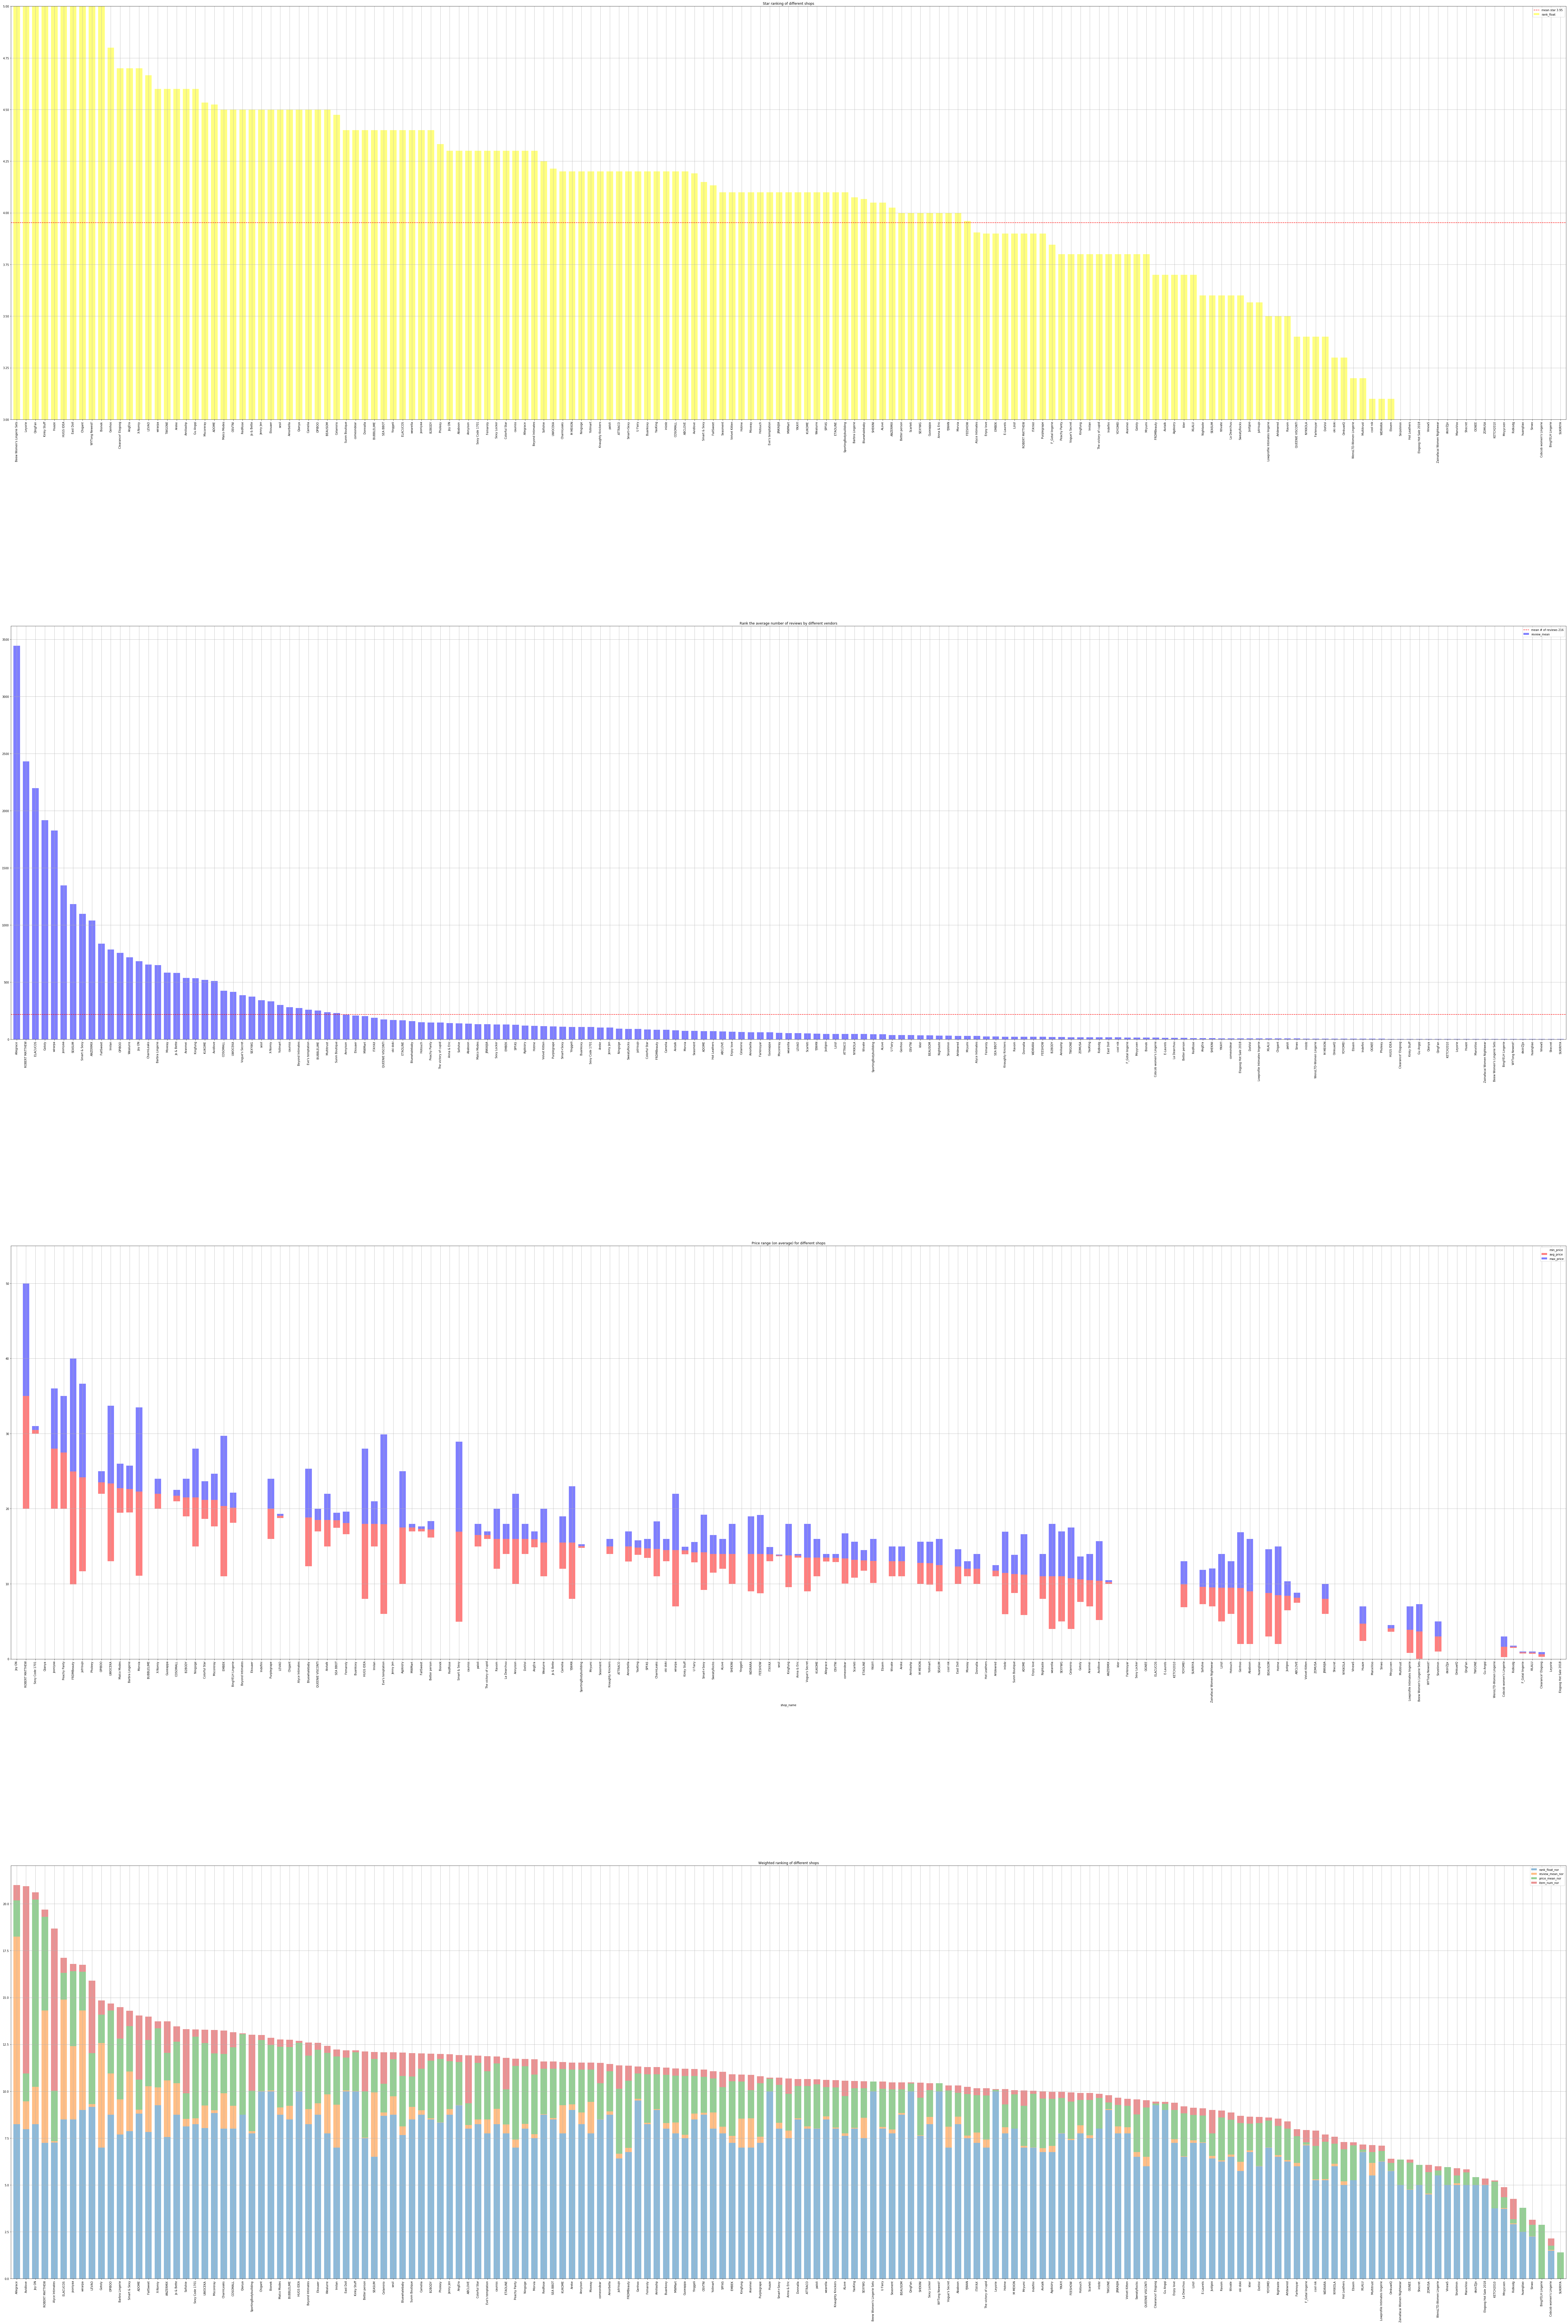

In [25]:
fig,axes = plt.subplots(4,1,figsize = (100,150))
plt.subplots_adjust(wspace =0, hspace =0.5)

# Star ranking of different businesses
df_star = df['rank_float'].sort_values(ascending = False)
df_star.plot(kind = 'bar',color = 'yellow',grid = True,alpha = 0.5,ax =axes[0],width =0.7,
                                              ylim = [3,5],title = 'Star ranking of different shops')
axes[0].axhline(df_star.mean(),label = 'mean star %.2f ' %df_star.mean() ,color = 'r' ,linestyle = '--',)
axes[0].legend(loc = 1)


# 不同商家的平均评论数排名
df_reviews_mean = df['review_mean'].sort_values(ascending = False)
df_reviews_mean.plot(kind = 'bar',color = 'blue',grid = True,alpha = 0.5,ax =axes[1],width =0.7,
                                              title = 'Rank the average number of reviews by different vendors')
axes[1].axhline(df_reviews_mean.mean(),label = 'mean # of reviews %i' %df_reviews_mean.mean() ,color = 'r' ,linestyle = '--',)
axes[1].legend(loc = 1)

# Price range (on average) for different shops
avg_price = (d-c)/2
avg_price.name = 'avg_price'
max_price = avg_price.copy()
max_price.name = 'max_price'

df_price = pd.concat([c,avg_price,max_price,df_re['price_mean']],axis=1)
df_price = df_price.sort_values(['price_mean'],ascending = False)
df_price.drop(['price_mean'],axis =1,inplace = True)
df_price.plot(kind = 'bar',grid = True,alpha = 0.5 , ax =axes[2],width =0.7,stacked = True,
              color= ['white','red','blue'],ylim = [0,55],title = 'Price range (on average) for different shops')


# 不同商家的加权分排名
df_nor = pd.concat([df_re['rank_float_nor'],df_re['review_mean_nor'],df_re['price_mean_nor'],df_re['item_num_nor']],axis =1)
df_nor['nor_total'] = df_re['rank_float_nor'] + df_re['review_mean_nor'] + df_re['price_mean_nor'] + df_re['item_num_nor']
df_nor = df_nor.sort_values(['nor_total'],ascending = False)
df_nor.drop(['nor_total'],axis = 1,inplace = True)
df_nor.plot(kind = 'bar',grid = True,alpha = 0.5 , ax =axes[3],width =0.7,stacked = True,
           title = 'Weighted ranking of different shops')

([<matplotlib.patches.Wedge at 0x2838ccb8710>,
 [Text(1.646090003548385, 0.11352400723229696, 'ABCLOVE'),
  Text(1.6067288913646642, 0.3753961502920311, 'ADOME'),
  Text(1.5531735736953083, 0.556912784890547, 'ALove'),
  Text(1.5111760761295656, 0.662455181075407, 'ANZERMIX'),
  Text(1.4706976751030534, 0.7480296440960574, 'ATTRACO'),
  Text(1.45314283077676, 0.7815855125078157, 'Ababoon'),
  Text(1.4348224943648404, 0.8147296543422596, 'Agdoizry'),
  Text(1.4157463167235163, 0.8474446098027869, 'Aivtalk'),
  Text(1.3857369377648499, 0.8956746838635646, 'Allegrace'),
  Text(1.1180644179180719, 1.2134380731564027, 'Alyce Intimates'),
  Text(0.7961378069634619, 1.4452212952774428, 'Amiliashp'),
  Text(0.76275990689101, 1.4631122050067171, 'Amorbella'),
  Text(0.7289801972650908, 1.4802323709456395, 'AngEra'),
  Text(0.6775962211814001, 1.5044478591964188, 'Anna & Eric'),
  Text(0.6254091590844213, 1.5268802781270434, 'Annyison'),
  Text(0.5724808630009737, 1.5475030408686314, 'Aranmei'),

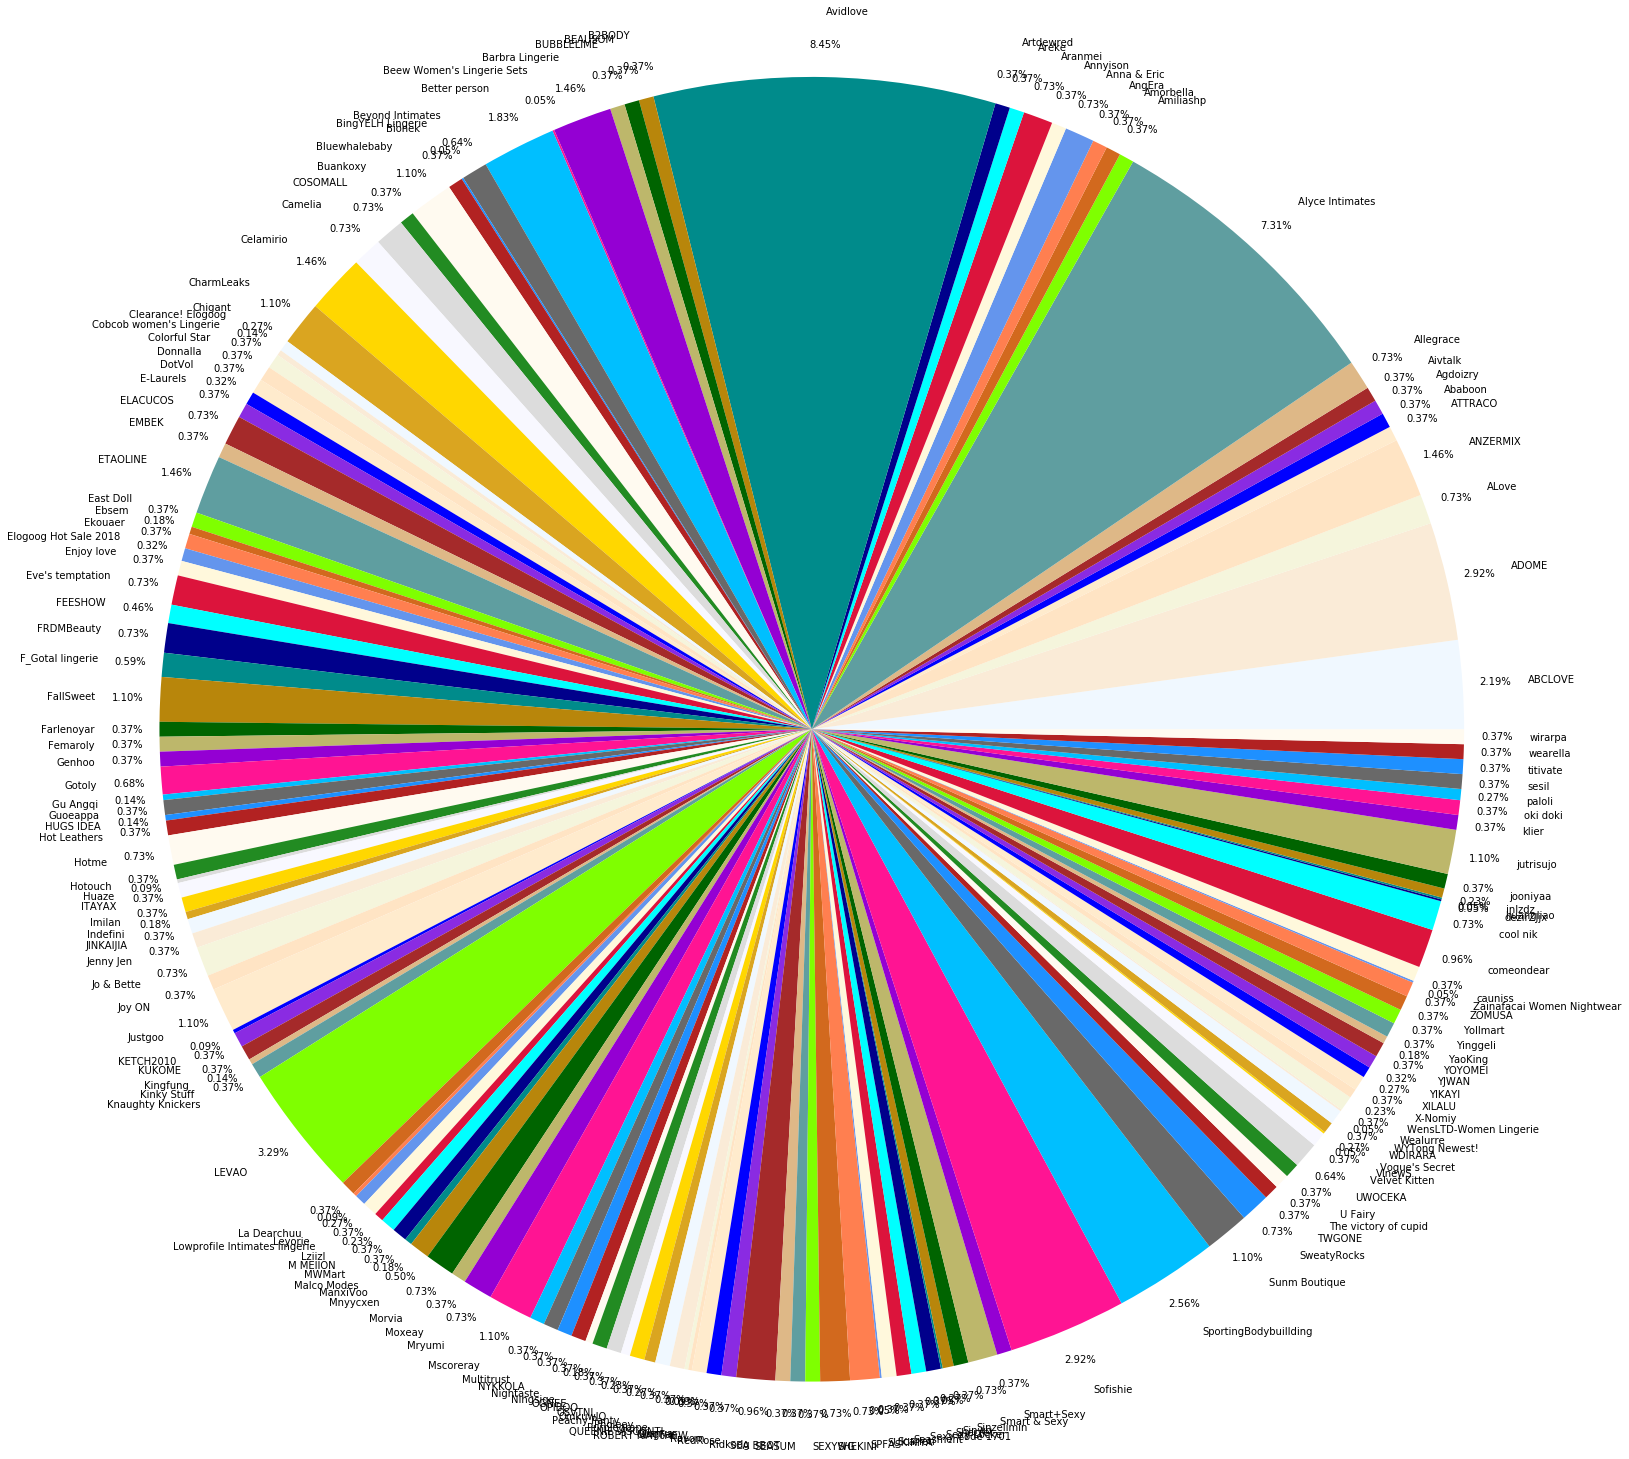

In [29]:
# pie chart of number of merchants
colors = ['aliceblue','antiquewhite','beige','bisque','blanchedalmond','blue','blueviolet','brown','burlywood',
          'cadetblue','chartreuse','chocolate','coral','cornflowerblue','cornsilk','crimson','cyan','darkblue','darkcyan','darkgoldenrod',
          'darkgreen','darkkhaki','darkviolet','deeppink','deepskyblue','dimgray','dodgerblue','firebrick','floralwhite','forestgreen',
           'gainsboro','ghostwhite','gold','goldenrod']

df_per = df_re['item_num']
fig,axes = plt.subplots(1,1,figsize = (20,20))
plt.axis('equal') #length = width 
plt.pie(df_per , 
        labels = df_per.index , 
        autopct = '%.2f%%',
        pctdistance = 1.05 , 
        #shadow = True ,
        startangle = 0 ,
        radius = 1.5 , 
        colors = colors,
        frame = False
        )

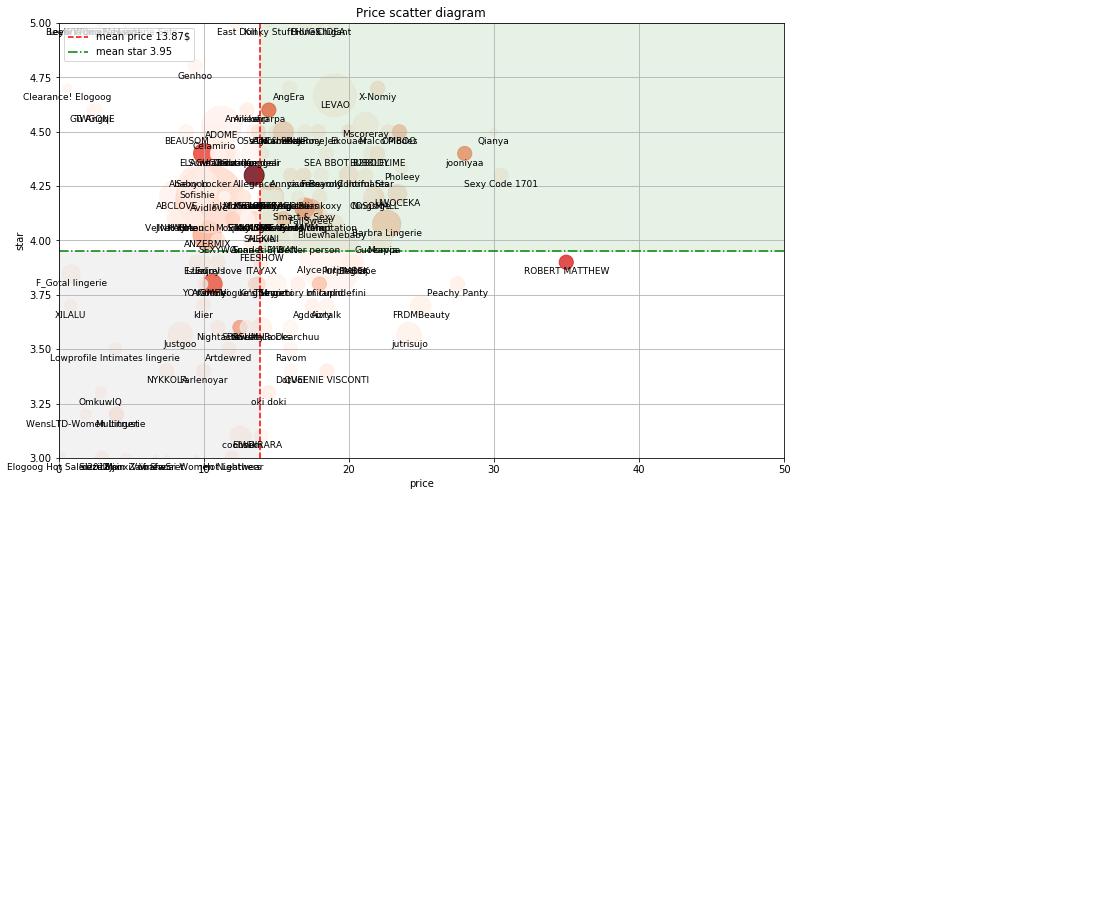

In [30]:
# Price scatter diagram
plt.figure(figsize=(13,8))
x = df_re['price_mean']       # x轴为均价
y = df_re['rank_float']             # y轴为星级
s = df_re['item_num']*100     # 点大小为商品数量，商品数量越大，点越大
c = df_re['review_mean']*10  # 点颜色为评论均值，评论均值越大，颜色越深红
plt.scatter(x,y,marker='.',cmap='Reds',alpha=0.8,
           s = s,c = c)
plt.grid()
plt.title('Price scatter diagram')
plt.xlim([0,50])
plt.ylim([3,5])
plt.xlabel('price')
plt.ylabel('star')

# Draw an average legend
p_mean = df_re['price_mean'].mean()
s_mean = df_re['rank_float'].mean()
plt.axvline(p_mean,label = 'mean price %.2f$' %p_mean ,color = 'r' ,linestyle = '--',)
plt.axhline(s_mean,label = 'mean star %.2f' %s_mean ,color = 'g' ,linestyle = '-.')
plt.axvspan(p_mean, 50, ymin= (s_mean-3)/(5-3), ymax=1,alpha = 0.1,color = 'g')
plt.axhspan(0, s_mean, xmin= 0 , xmax=p_mean/50,alpha = 0.1,color = 'grey')
plt.legend(loc = 2)

# Add merchant label
for x,y,name in zip(df_re['price_mean'],df_re['rank_float'],df_re.index):
    plt.annotate(name, xy=(x,y),xytext = (0, -5), textcoords = 'offset points',ha = 'center', va = 'top',fontsize = 9)


